Define Dataset for analyses

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

## 0. Define file path

In [2]:
path = 'G:\\Data\\Qudi_Data\\2024\\02\\20240225\\AttoDRY2200_Pi3_SPM\\'
filebeginning = '20240225-0715-37_scan144_laser67.5mV_200mT_Bnv_sFC_2K_autosave_NbSe2_S2_A-T17-12_' #here the beginning of the filename, including the date and sample name, is needed
filepath = path + filebeginning

In [3]:
with open(filepath+'qafm_array_raw.pickle', 'rb') as f:
    qafm_data = pickle.load(f)
with open(filepath+'pulsed_array_raw.pickle', 'rb') as f:
    pulsed_data = pickle.load(f)

## 1a. Load from analysis pickle if exists

In [3]:
#Load pulsed array with B field from pickel
with open(filepath+'pulsed_array_bfield_T.pickle', 'rb') as f:
    pulsed_data = pickle.load(f)
b_field = pulsed_data['pulsed_fw']['b_field']

Traceback (most recent call last):
  File "C:\Users\yy3\Documents\Software\qudi\logic\jupyterkernel\qzmqkernel.py", line 679, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-81dc6b2b8a4e>", line 2, in <module>
    with open(filepath+'pulsed_array_bfield_T.pickle', 'rb') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'G:\\Data\\Qudi_Data\\2023\\10\\20231029\\AttoDRY2200_Pi3_SPM\\20231029-0936-40_scan37_24mTBnv_FC_3.1K_old_region_single_vortex_autosave_NbSe2_02_A-T17-12_pulsed_array_bfield_T.pickle'


## 1b. Load current data from qafm logic

In [44]:
qafm_data = afm_scanner_logic._qafm_scan_array.copy()
pulsed_data = afm_scanner_logic._pulsed_scan_array.copy()

## 2. Determine bias field

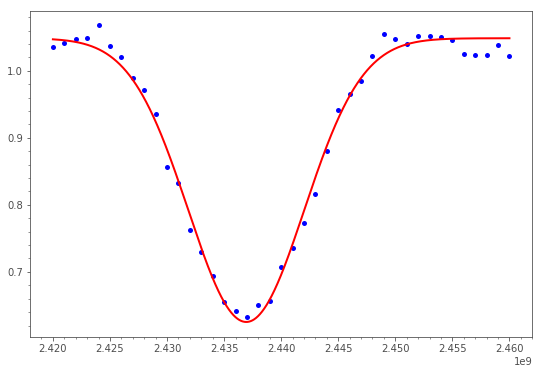

Bias field:  0.18989067983282001 T
FWHM:  11.94460656646971 MHz
Contrast:  40.37226862730478 %


In [4]:
#Analyse bias field
#Gathering data from dictonary
directory = 'G:\\Data\\Qudi_Data\\2024\\02\\20240223\\PODMR\\'
podrm_path = directory + '20240223-2024-23_scan143_200mT_Bnv_sFC_2K_OOC_ODMR_data_ch0_range0'+'.dat'
data_raw = np.loadtxt(podrm_path).T
var_list,data = (data_raw[0],data_raw[1])

gyro_nv = 28e9 #in Hz/T
e_field = 0 #in Hz
zero_field = 2.88e9 #in Hz, watch the Temperature

mode = 'gaussian_dip'
gslac = True
left = True

#Determine fit

if mode == 'double':
    fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_dip)
    lm,_ = fitlogic.make_lorentziandouble_model()
    
elif mode == 'N15':
    fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_N15)
    lm,_ = fitlogic.make_lorentziandouble_model()
    
elif mode == 'N14':
    fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_N14)
    lm,_ = fitlogic.make_lorentziandouble_model()
    
elif mode == 'gaussian_dip':
        fit = afm_scanner_logic._fitlogic.make_gaussian_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_gaussian_dip)
        lm,_ = fitlogic.make_gaussian_model()
    
else:    
    fit = afm_scanner_logic._fitlogic.make_lorentzian_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentzian_dip)
    lm,_ = fitlogic.make_lorentzian_model()

# print(fit.fit_report())
bias_res_freq = fit.params['center'].value

if gslac == True and left == True:
    b_field_bias = np.sqrt(abs(bias_res_freq + zero_field)**2 - e_field**2) / gyro_nv
else:
    b_field_bias = np.sqrt(abs(bias_res_freq - zero_field)**2 - e_field**2) / gyro_nv

#Plot Data an
plt.plot(var_list,data,'bo')

x = np.linspace(var_list[0],var_list[-1],10000, endpoint=True)
plt.plot(x, lm.eval(fit.params, x=x),'r-')

plt.show()
fwhm_bias = fit.params['fwhm'].value*1e-6 #FWHM in MHz
contrast_bias = fit.params['contrast'].value*-1
print('Bias field: ',b_field_bias,'T')
print("FWHM: ",fwhm_bias,'MHz')
print("Contrast: ",contrast_bias,'%')

Analyse single PODMR with chosen Lorentzian

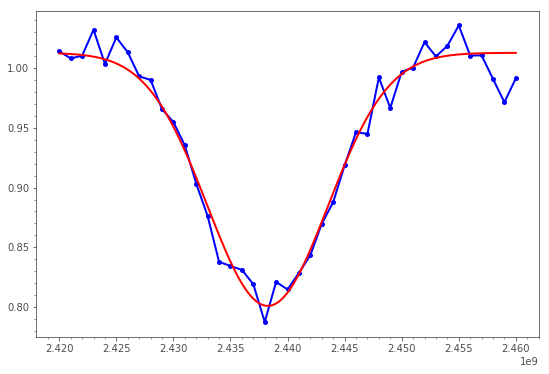

In [5]:
#Analyse single spectrum
#Gathering data from dictonary
data = pulsed_data['pulsed_fw']['data']
var_list = pulsed_data['pulsed_fw']['coord2_arr']

i = 0
j = 1
mode = 'gaussian_dip'

#Determine fit

if mode == 'double':
    fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data[i,j],estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_dip)
    lm,_ = fitlogic.make_lorentziandouble_model()
    print(fit.params['l0_center'].value)
    
elif mode == 'N15':
    fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data[i,j],estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_N15)
    lm,_ = fitlogic.make_lorentziandouble_model()
    print(fit.params['l0_center'].value)
    
elif mode == 'N14':
    fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data[i,j],estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_N14)
    lm,_ = fitlogic.make_lorentziandouble_model()
    print(fit.params['l0_center'].value)
    
elif mode == 'gaussian_dip':
        fit = afm_scanner_logic._fitlogic.make_gaussian_fit(var_list,data[i,j],estimator=afm_scanner_logic._fitlogic.estimate_gaussian_dip)
        lm,_ = fitlogic.make_gaussian_model()
    
else:    
    fit = afm_scanner_logic._fitlogic.make_lorentzian_fit(var_list,data[i,j],estimator=afm_scanner_logic._fitlogic.estimate_lorentzian_dip)
    lm,_ = fitlogic.make_lorentzian_model()
    print(fit.params['center'].value)

#print(fit.fit_report())


#Plot Data and fit
plt.plot(var_list,data[i,j],'bo-')

x = np.linspace(var_list[0],var_list[-1],10000, endpoint=True)
plt.plot(x, lm.eval(fit.params, x=x),'r-')

plt.show()

## 3. Fit full scan with chosen lorentzian (expensive-ish)

In [6]:
#Analyse scan with PODMR
#Gathering data from dictonary

data = pulsed_data['pulsed_fw']['data'][:,:]
var_list = pulsed_data['pulsed_fw']['coord2_arr']
coord0_num = qafm_data['Height(Dac)_fw']['params']['coord0_num (#)']
coord1_num = qafm_data['Height(Dac)_fw']['params']['coord1_num (#)']
res_freq = np.zeros((coord1_num,coord0_num))
res_freq_err = np.zeros((coord1_num,coord0_num))
fwhm = np.zeros((coord1_num,coord0_num))
fwhm_err = np.zeros((coord1_num,coord0_num))
contrast = np.zeros((coord1_num,coord0_num))
contrast_err = np.zeros((coord1_num,coord0_num))
b_field = np.zeros((coord1_num,coord0_num))
b_field_err = np.zeros((coord1_num,coord0_num))
error_array = np.zeros((coord1_num,coord0_num))

#Define parameters for magnetic field calculation
gyro_nv = 28e9 #in Hz/T
e_field = 0 #in Hz
zero_field = 2.88e9 #in Hz, watch the Temperature

#Define the measured peak properties
mode = 'gaussian_dip'
gslac = True
left = True

for i in range(coord1_num):
    for j in range(coord0_num):
        
        #Determine fit
        try:
            if mode == 'double':
                fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data[i,j],estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_dip)
                res_freq[i,j] = fit.params['l0_center'].value + (fit.params['l1_center'].value-fit.params['l0_center'].value)/2
                
            elif mode == 'N15':
                fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data[i,j],estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_N15)
                res_freq[i,j] = fit.params['l0_center'].value + (fit.params['l1_center'].value-fit.params['l0_center'].value)/2
                
            elif mode == 'N14':
                fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data[i,j],estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_N14)
                res_freq[i,j] = fit.params['l0_center'].value
            
            elif mode == 'gaussian_dip':
                fit = afm_scanner_logic._fitlogic.make_gaussian_fit(var_list,data[i,j],estimator=afm_scanner_logic._fitlogic.estimate_gaussian_dip)
                res_freq[i,j] = fit.params['center'].value
                res_freq_err[i,j] = fit.params['center'].stderr
                fwhm[i,j] = fit.params['fwhm'].value*1e-6 #FWHM in MHz
                fwhm_err[i,j] = fit.params['fwhm'].stderr*1e-6
                contrast[i,j] = fit.params['contrast'].value*-1
                contrast_err[i,j] = fit.params['contrast'].stderr*-1
            
            else:    
                fit = afm_scanner_logic._fitlogic.make_lorentzian_fit(var_list,data[i,j],estimator=afm_scanner_logic._fitlogic.estimate_lorentzian_dip)
                res_freq[i,j] = fit.params['center'].value
                fwhm[i,j] = fit.params['fwhm'].value*1e-6 #FWHM in MHz
        
        except:
            error_array[i,j] = 1
            
if gslac == True and left == True:
    b_field = np.sqrt(abs(res_freq + zero_field)**2 - e_field**2) / gyro_nv
else:
    b_field = np.sqrt(abs(res_freq - zero_field)**2 - e_field**2) / gyro_nv

## 4. Plot all fit data
#### Corrected and uncorrected stray field

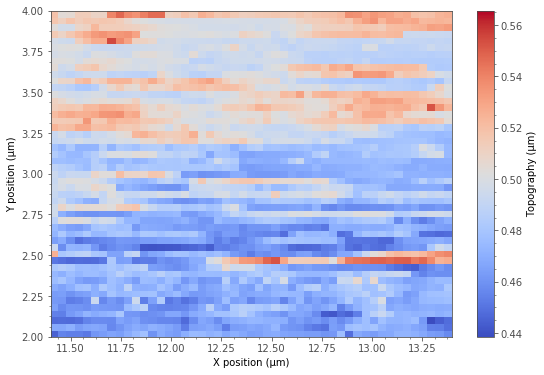

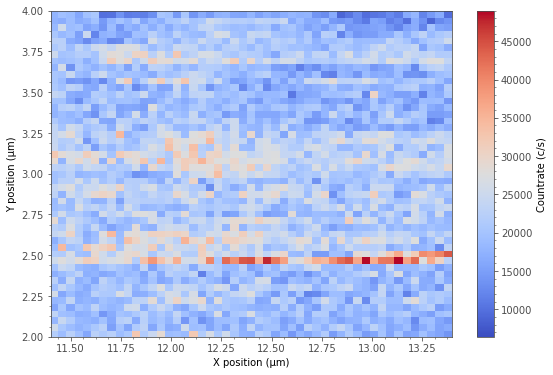

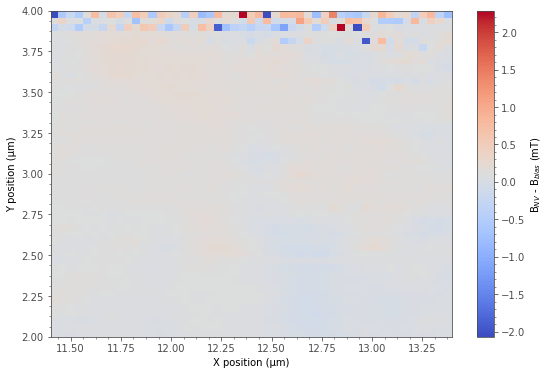

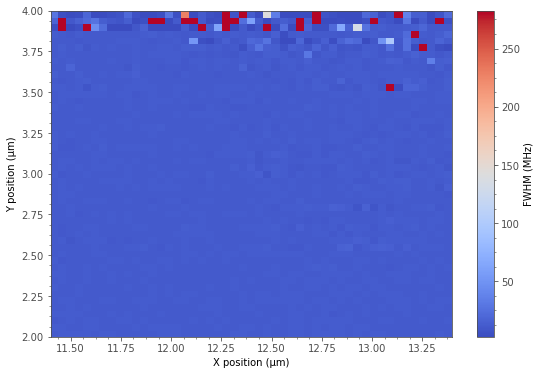

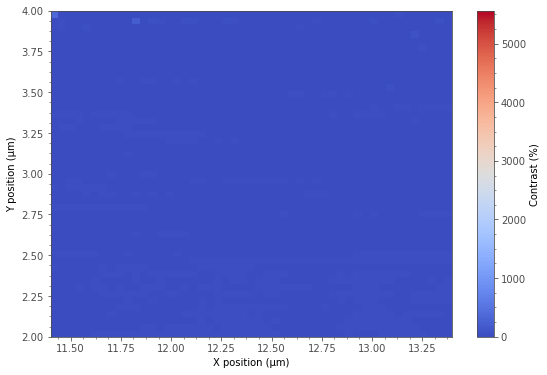

In [7]:
#Plot analysed Data from PODMR
x_gwy = qafm_data['Height(Dac)_fw']['coord0_arr']
y_gwy = qafm_data['Height(Dac)_fw']['coord1_arr']
x = x_gwy*10**6
y = y_gwy*10**6

#for gwyddion
dataobj = {}

## TOPO ##

low_centile = 0
high_centile = 100
data = qafm_data['Height(Dac)_fw']['data']*10**6
plt.pcolormesh(x,y,data,cmap=plt.cm.get_cmap('coolwarm'), vmin =np.nanpercentile(data, low_centile), vmax = np.nanpercentile(data, high_centile))
plt.xlabel('X position (\u03BCm)')
plt.ylabel('Y position (\u03BCm)')
plt.colorbar(label = 'Topography (\u03BCm)')
plt.show()
#for gwyddion
dataobj['Topography'] = {
                            'coord0_arr':x_gwy,
                            'coord1_arr':y_gwy,
                            'data':qafm_data['Height(Dac)_fw']['data'],
                            'params': {'coord0_start': x_gwy[0],'coord0_stop': x_gwy[-1],'coord1_start': y_gwy[0],'coord1_stop': y_gwy[-1]},
                            'xy_units': 'm',                                                
                            'si_units': 'm',
                            'nice_name': 'Topography'
    
                        }
## COUNTS ##

low_centile = 0
high_centile = 100
data = qafm_data['counts_fw']['data']
plt.pcolormesh(x,y,data,cmap=plt.cm.get_cmap('coolwarm'), vmin =np.nanpercentile(data, low_centile), vmax = np.nanpercentile(data, high_centile))
plt.xlabel('X position (\u03BCm)')
plt.ylabel('Y position (\u03BCm)')
plt.colorbar(label = 'Countrate (c/s)')
plt.show()
#for gwyddion
dataobj['Fluorescence'] = {
                            'coord0_arr':x_gwy,
                            'coord1_arr':y_gwy,
                            'data':qafm_data['counts_fw']['data'],
                            'params': {'coord0_start': x_gwy[0],'coord0_stop': x_gwy[-1],'coord1_start': y_gwy[0],'coord1_stop': y_gwy[-1]},
                            'xy_units': 'm',                                                
                            'si_units': 'c/s',
                            'nice_name': 'Fluorescence'
    
                        }
## RES FREQ ##

# low_centile = 0.75
# high_centile = 99.8
# data = res_freq/10**9
# plt.pcolormesh(x,y,data,cmap=plt.cm.get_cmap('coolwarm'), vmin =np.nanpercentile(data, low_centile), vmax = np.nanpercentile(data, high_centile))
# plt.xlabel('X position (\u03BCm)')
# plt.ylabel('Y position (\u03BCm)')
# plt.colorbar(label = 'Frequency (GHz)')
# plt.show()


## BFIELD CORR mT ##

low_centile = 0
high_centile = 100
data = b_field*10**3 -b_field_bias*10**3 # b_field_bias is found earlier from OOC fit. In tesla
plt.pcolormesh(x,y,data,cmap=plt.cm.get_cmap('coolwarm'), vmin =np.nanpercentile(data, low_centile), vmax = np.nanpercentile(data, high_centile))
plt.xlabel('X position (\u03BCm)')
plt.ylabel('Y position (\u03BCm)')
plt.colorbar(label = 'B$_{NV}$ - B$_{bias}$ (mT)')
plt.show()
#for gwyddion
dataobj['Stray Field'] = {
                            'coord0_arr':x_gwy,
                            'coord1_arr':y_gwy,
                            'data':b_field-b_field_bias,
                            'params': {'coord0_start': x_gwy[0],'coord0_stop': x_gwy[-1],'coord1_start': y_gwy[0],'coord1_stop': y_gwy[-1]},
                            'xy_units': 'm',                        
                            'si_units': 'T',
                            'nice_name': 'Stray Field: B_NV - B_bias'
    
                        }

## FWHM ##

low_centile = 0
high_centile = 100
data = fwhm # b_field_bias is found earlier from OOC fit. In tesla
plt.pcolormesh(x,y,data,cmap=plt.cm.get_cmap('coolwarm'), vmin =np.nanpercentile(data, low_centile), vmax = np.nanpercentile(data, high_centile))
plt.xlabel('X position (\u03BCm)')
plt.ylabel('Y position (\u03BCm)')
plt.colorbar(label = 'FWHM (MHz)')
plt.show()
#for gwyddion
dataobj['Linewidth'] = {
                            'coord0_arr':x_gwy,
                            'coord1_arr':y_gwy,
                            'data':data*1e6,
                            'params': {'coord0_start': x_gwy[0],'coord0_stop': x_gwy[-1],'coord1_start': y_gwy[0],'coord1_stop': y_gwy[-1]},
                            'xy_units': 'm',                        
                            'si_units': 'Hz',
                            'nice_name': 'Linewidth'
    
                        }


low_centile = 0
high_centile = 100
data = contrast
plt.pcolormesh(x,y,data,cmap=plt.cm.get_cmap('coolwarm'), vmin =np.nanpercentile(data, low_centile), vmax = np.nanpercentile(data, high_centile))
plt.xlabel('X position (\u03BCm)')
plt.ylabel('Y position (\u03BCm)')
plt.colorbar(label = 'Contrast (%)')
plt.show()
#for gwyddion
dataobj['Contrast'] = {
                            'coord0_arr':x_gwy,
                            'coord1_arr':y_gwy,
                            'data':data,
                            'params': {'coord0_start': x_gwy[0],'coord0_stop': x_gwy[-1],'coord1_start': y_gwy[0],'coord1_stop': y_gwy[-1]},
                            'xy_units': 'm',                        
                            'si_units': '%',
                            'nice_name': 'Contrast'
    
                        }

## 5.a Save to new gwyddion file - data defined in previous cell

In [8]:
"""save_obj_to_gwyddion(): writes qudi data object to Gwyddion file
        input:  
        - dataobj: proteusQ data object of from dataobj['data_key']
        - filename: file path to save object
        - prefix:  name to be prefixed to all head objects

        requirements:
        dataobj['scan_type'] must contain keys {coord0[], coord1[], data[,], params[coord0-1_start-stop], si_units, nice_name}
    """
from logic import gwyfile as gwy
save_obj_to_gwyddion(dataobj=dataobj,filename=filepath+'QAFM_jupyter_corrected.gwy')

## 5. Save plots - topo and counts in png/pdf

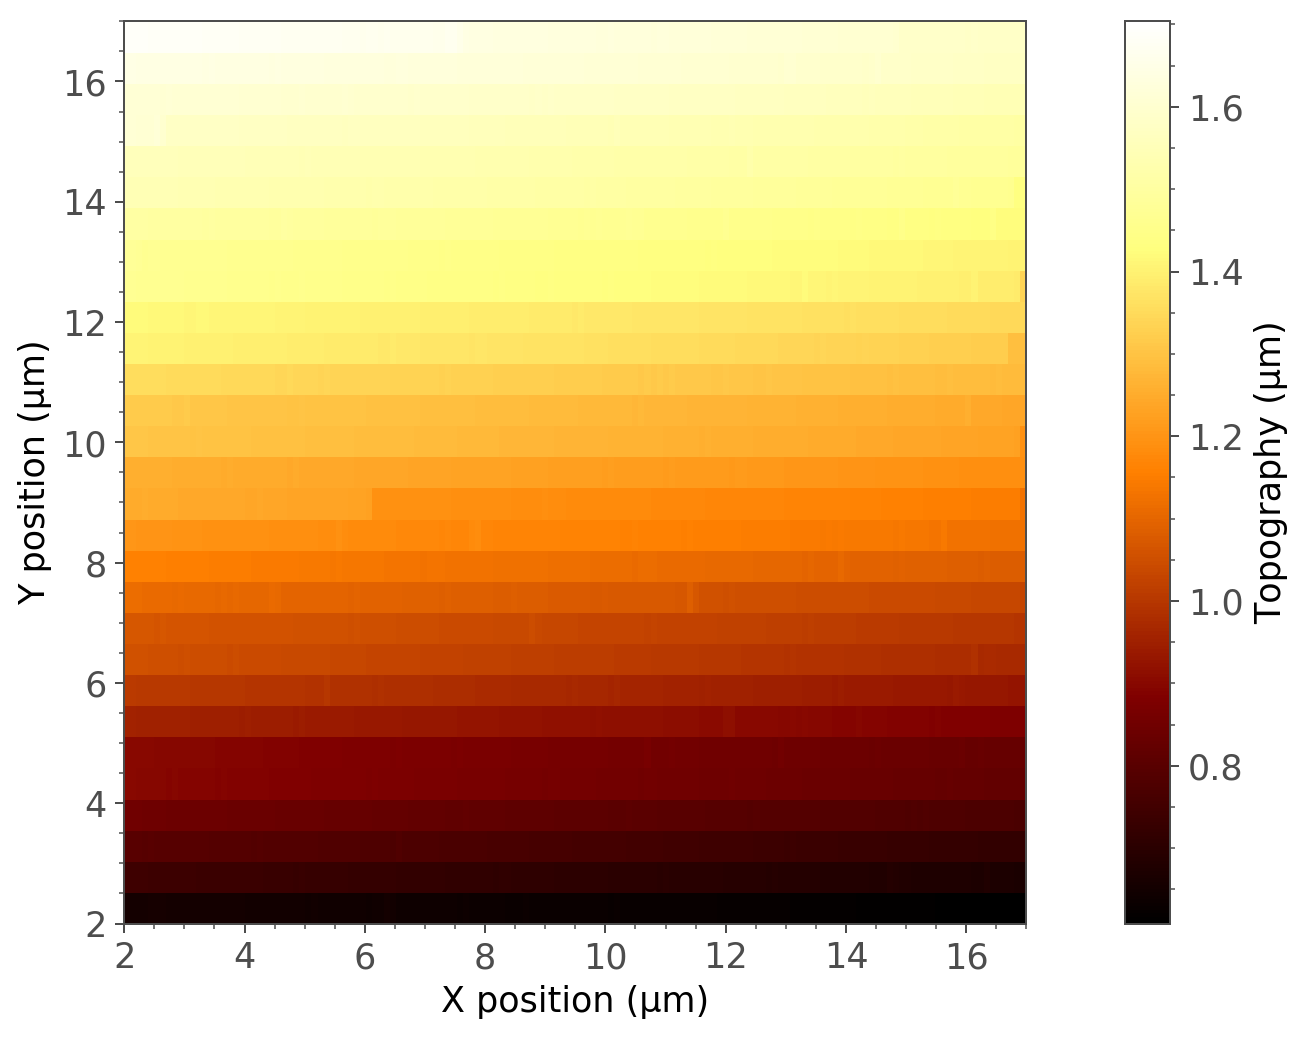

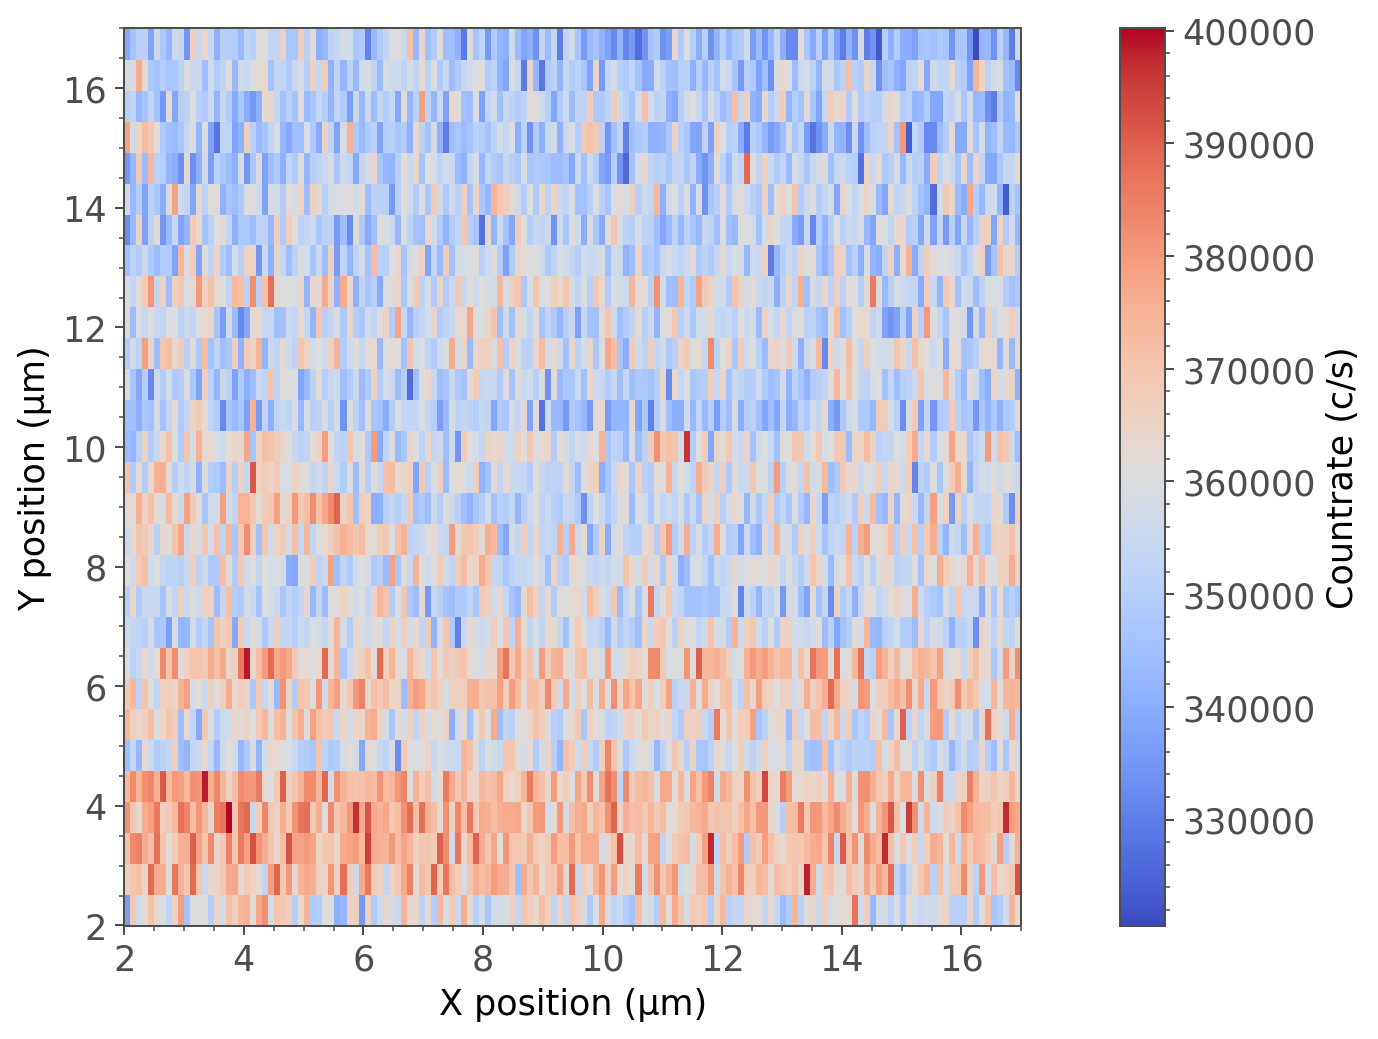

In [129]:
#Save Topo and Counts as png as needed
x = qafm_data['Height(Dac)_fw']['coord0_arr']*10**6
y = qafm_data['Height(Dac)_fw']['coord1_arr']*10**6
low_centile = 0
high_centile = 100
show_data = qafm_data['Height(Dac)_fw']['data']*10**6
plt.pcolormesh(x,y,show_data,cmap=plt.cm.get_cmap('afmhot'), vmin =np.nanpercentile(show_data, low_centile), vmax = np.nanpercentile(show_data, high_centile))
plt.xlabel('X position (\u03BCm)')
plt.ylabel('Y position (\u03BCm)')
plt.colorbar(label = 'Topography (\u03BCm)')
plt.tight_layout()
plt.gca().set_aspect('equal')
with open(filepath+'QAFM_Height(Dac)_fw_fig_corrected.png', 'wb') as f:
    plt.savefig(f,format='png')
with open(filepath+'QAFM_Height(Dac)_fw_fig_corrected.pdf', 'wb') as f:
    plt.savefig(f,format='pdf')    
plt.show()
    
low_centile = 0
high_centile = 100
show_data = qafm_data['counts_fw']['data']
plt.pcolormesh(x,y,show_data,cmap=plt.cm.get_cmap('coolwarm'), vmin =np.nanpercentile(show_data, low_centile), vmax = np.nanpercentile(show_data, high_centile))
plt.xlabel('X position (\u03BCm)')
plt.ylabel('Y position (\u03BCm)')
plt.colorbar(label = 'Countrate (c/s)')
plt.tight_layout()
plt.gca().set_aspect('equal')
with open(filepath+'QAFM_counts_fw_fig_corrected.png', 'wb') as f:
    plt.savefig(f,format='png')
with open(filepath+'QAFM_counts_fw_fig_corrected.pdf', 'wb') as f:
    plt.savefig(f,format='pdf')
plt.show()

## 5. Save plots - (un)corrected in png/pdf/svg

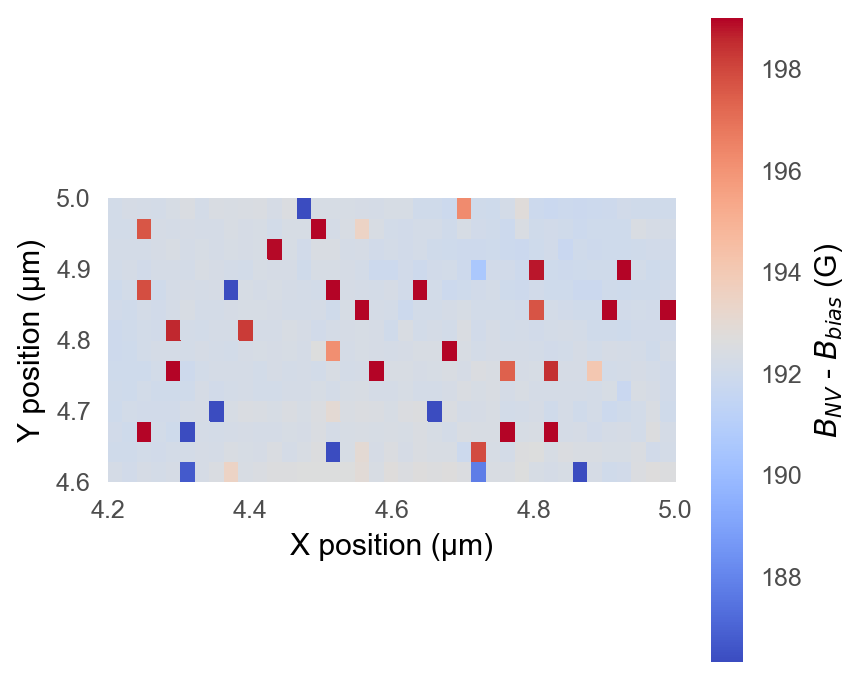

In [55]:
#Save b field image in Gauss
x = qafm_data['Height(Dac)_fw']['coord0_arr']*10**6-2
y = qafm_data['Height(Dac)_fw']['coord1_arr']*10**6-2
plt.figure(figsize=(5,4))
low_centile = 1
high_centile = 98.8
fontsize = 12

data = (b_field-b_field_bias)*10**4
data = (b_field)*10**4-6.125 #-b_field_bias*10**4

fig = plt.pcolormesh(x,y,data,cmap=plt.cm.get_cmap('coolwarm'), vmin =np.nanpercentile(data, low_centile), vmax = np.nanpercentile(data, high_centile),edgecolors = 'face')
plt.xlabel('X position (\u03BCm)', fontsize=fontsize)
plt.ylabel('Y position (\u03BCm)', fontsize=fontsize)
#plt.colorbar(label = '$B_{NV}$ - $B_{bias}$ (G)')
plt.colorbar(fig).set_label(label='$B_{NV}$ - $B_{bias}$ (G)',size=fontsize)
plt.gca().set_aspect('equal')
plt.tight_layout()
with open(filepath+'QAFM_b_field_fw_fig_corrected_2.png', 'wb') as f:
    plt.savefig(f,format='png')
with open(filepath+'QAFM_b_field_fw_fig_corrected_2.pdf', 'wb') as f:
    plt.savefig(f,format='pdf')
with open(filepath+'QAFM_b_field_fw_fig_corrected_2.svg', 'wb') as f:
    plt.savefig(f,format='svg')

plt.show()

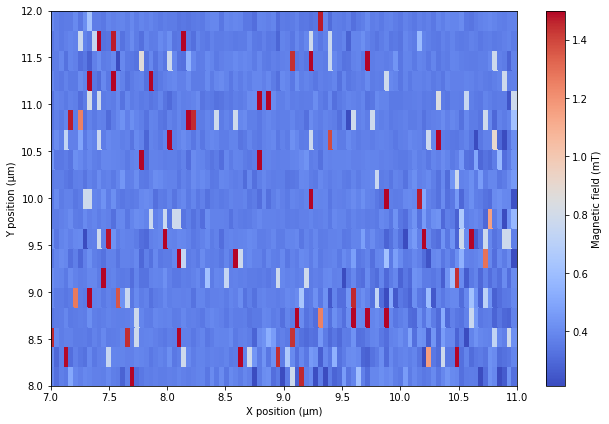

In [14]:
#Save b field image in mT
x = qafm_data['Height(Dac)_fw']['coord0_arr']*10**6
y = qafm_data['Height(Dac)_fw']['coord1_arr']*10**6
low_centile = 1.5
high_centile = 99

plt.pcolormesh(x,y,b_field*10**3,cmap=plt.cm.get_cmap('coolwarm'), vmin =np.nanpercentile(b_field*10**3, low_centile), vmax = np.nanpercentile(b_field*10**3, high_centile),edgecolors = 'face')
plt.xlabel('X position (\u03BCm)')
plt.ylabel('Y position (\u03BCm)')
plt.colorbar(label = 'Magnetic field (mT)')
plt.tight_layout()
plt.gca().set_aspect('equal')
with open(filepath+'QAFM_b_field_fw_mT_fig_corrected.png', 'wb') as f:
    plt.savefig(f,format='png')2
with open(filepath+'QAFM_b_field_fw_mT_fig_corrected.pdf', 'wb') as f:
    plt.savefig(f,format='pdf')
with open(filepath+'QAFM_b_field_fw_mT_fig_corrected.svg', 'wb') as f:
    plt.savefig(f,format='svg')
plt.show()

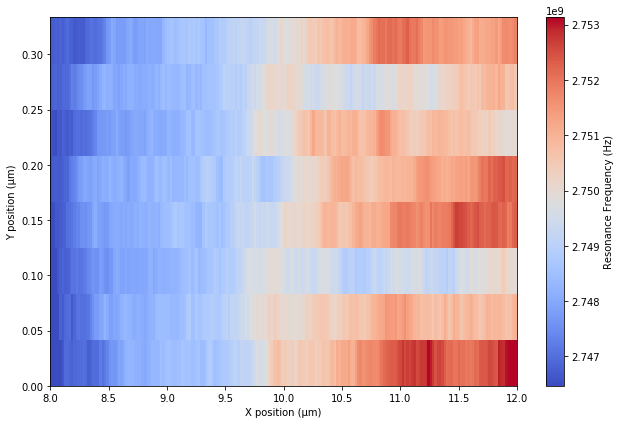

In [30]:
#Save res. freq. image
x = qafm_data['Height(Dac)_fw']['coord0_arr']*10**6
y = qafm_data['Height(Dac)_fw']['coord1_arr'][0:9]*10**6
low_centile = 0.75
high_centile = 99.8

show_data = qafm_data['fit_param_fw']['data'][0:9,:]
plt.pcolormesh(x,y,show_data,cmap=plt.cm.get_cmap('coolwarm'), vmin =np.nanpercentile(show_data, low_centile), vmax = np.nanpercentile(show_data, high_centile))
plt.xlabel('X position (\u03BCm)')
plt.ylabel('Y position (\u03BCm)')
plt.colorbar(label = 'Resonance Frequency (Hz)')
plt.tight_layout()
plt.gca().set_aspect('equal')
with open(filepath+'QAFM_res_freq_fw_fig_corrected.png', 'wb') as f:
    plt.savefig(f,format='png')
with open(filepath+'QAFM_res_freq_fw_fig_corrected.pdf', 'wb') as f:
    plt.savefig(f,format='pdf')
with open(filepath+'QAFM_res_freq_fw_fig_corrected.svg', 'wb') as f:
    plt.savefig(f,format='svg')
plt.show()

## 6. Save data to pickle

In [120]:
#Save calculated B field to pickel
pulsed_array = pulsed_data
pulsed_array['pulsed_fw']['b_field_NV'] = b_field
pulsed_array['pulsed_fw']['b_field_bias'] = b_field_bias
pulsed_array['pulsed_fw']['b_field_NV-b_field_bias'] = b_field-b_field_bias
with open(filepath+'pulsed_array_bfield_T.pickle', 'wb') as f:
    pickle.dump(pulsed_array, f)

In [20]:
with open(filepath+'qafm_array_raw.pickle', 'wb') as f:
    pickle.dump(afm_scanner_logic._qafm_scan_array, f)
with open(filepath+'pulsed_array_raw.pickle', 'wb') as f:
    pickle.dump(afm_scanner_logic._pulsed_scan_array, f)

In [7]:
pulsed_data['pulsed_fw'].keys()

dict_keys(['data', 'data_alternating', 'data_std', 'data_alternating_std', 'data_fit', 'data_alternating_fit', 'data_delta', 'data_raw', 'coord0_arr', 'coord1_arr', 'coord2_arr', 'measured_units', 'scale_fac', 'si_units', 'nice_name', 'params', 'display_range', 'b_field'])

## 5.a.i. Save data to Gwyddion function

In [7]:
def save_obj_to_gwyddion(dataobj,filename,gwytypes=['image']):
    """save_obj_to_gwyddion(): writes qudi data object to Gwyddion file
        input:  
        - dataobj: proteusQ data object of from dataobj['data_key']
        - filename: file path to save object
        - prefix:  name to be prefixed to all head objects

        requirements:
        dataobj['scan_type'] must contain keys {coord0[], coord1[], data[,], params[coord0-1_start-stop], si_units, nice_name}
    """

    # check for existance of valid object names
    datakeys = list(dataobj.keys())

    # overall object container
    objout = gwy.objects.GwyContainer()

    for dataki,datak in enumerate(sorted(datakeys, key=str.lower)):
        meas = dataobj[datak]

        # check that data is valid
        if not {'coord0_arr','coord1_arr','data'}.issubset(set(meas.keys())):
            continue 

        # check that there is non-trivial data (skip empty measurements)
        if np.sum(meas['data']) == 0.0:
            continue

        # transform data
        #scalefactor = meas['scale_fac']
        coord0 = meas['coord0_arr']
        coord1 = meas['coord1_arr']
        data_si = meas['data'] #* scalefactor

        params = meas['params']
        coord0_start = next(k for k in params.keys() if k.startswith('coord0_start'))
        coord0_stop = next(k for k in params.keys() if k.startswith('coord0_stop'))
        coord1_start = next(k for k in params.keys() if k.startswith('coord1_start'))
        coord1_stop = next(k for k in params.keys() if k.startswith('coord1_stop'))

        xy_units = meas['xy_units']
        z_units = meas['si_units']
        measname = datak + ":" + meas['nice_name']

        # encode to image
        img = gwy.objects.GwyDataField(data=data_si, si_unit_xy=xy_units, si_unit_z=z_units)
        img.xoff = params[coord0_start]
        img.xreal = params[coord0_stop] - params[coord0_start]
        img.yoff = params[coord1_start]
        img.yreal = params[coord1_stop] - params[coord1_start]

        # add to parent object 
        if 'image' in gwytypes: 
            # image types
            basekey = '/' + str(dataki) + '/data'
            objout[basekey + '/title'] = measname
            objout['/' + str(dataki) + '/base/palette'] = 'Sky'
            objout[basekey] = img
            # comment meta data
            if meas['params']:
                d = {key: str(val) for key, val in meas['params'].items()}
                meta = gwy.objects.GwyContainer(d)
                objout['/' + str(dataki) + '/meta'] = meta

    # write out file    
    if objout:
        objout.tofile(filename)